In [1]:
!pip install matplotlib

In [2]:
from pathlib import Path
from configparser import ConfigParser


import pandas as pd
import geopandas as gpd

import numpy as np

import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [3]:
config_file = "config.ini"
config = ConfigParser()
config.read(config_file)

year_list = [int(y) for y in config["main"]["years"].split(", ")]
base_path = Path(config["main"]["output_dir"]) 

start_year = min(year_list)
end_year = max(year_list)


In [4]:

extract_path = base_path / "extract.csv"

gcdf_path = base_path / "gcdf" / "all_combined_global.gpkg"

In [5]:
gcdf_gdf = gpd.read_file(gcdf_path, driver="GPKG")

extract_df = pd.read_csv(extract_path)

/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


In [6]:
len(extract_df)

7

In [7]:
extract_df

,ndvi_2001,ndvi_2011,pop_2001,pop_2011,id,Recipient,Recipient.ISO-3,Title,Status,Amount.(Constant.USD.2021)
0,1636.750000,1433.937500,12.669615,40.075386,256,Niger,NER,China Eximbank provides RMB 650 million govern...,Completion,1.236623e+08
1,1196.958333,951.363636,262.151428,1629.226440,39943,Uzbekistan,UZB,ICBC provides $29.2 million export buyer's cre...,Completion,7.123050e+07
2,4934.200000,4569.111111,1843.439697,2277.384033,52175,Zambia,ZMB,China Development Bank provides $29 million lo...,Completion,3.254599e+07
3,6164.603535,5377.238095,4420.025391,6291.714355,64488,Viet Nam,VNM,China Eximbank provides RMB 336.15 million gov...,Completion,9.893356e+07
4,7574.000000,6761.000000,15.062001,22.629385,64615,Ecuador,ECU,"CDB, BoC, and ABC provide $329 million loan to...",Completion,4.582072e+08
5,1908.125000,1608.409091,13867.176758,11410.609375,67103,Iran,IRN,China Eximbank provides $143.91 million buyer'...,Completion,3.505739e+08
6,1636.750000,1433.937500,12.669615,40.075386,91977,Niger,NER,China Eximbank provides $142 million buyer’s c...,Completion,2.132854e+08


In [13]:

extract_df["name"] = extract_df.apply(lambda x: f"{x.Recipient} ({x.id})", axis=1)

site_list = extract_df.id.unique()

(base_path / "plots").mkdir(exist_ok=True)

min_ndvi = extract_df[[i for i in extract_df.columns if "ndvi" in i]].min().min() * 0.9
min_pop = extract_df[[i for i in extract_df.columns if "pop" in i]].min().min() * 0.9

max_ndvi = extract_df[[i for i in extract_df.columns if "ndvi" in i]].max().max() * 1.1
max_pop = extract_df[[i for i in extract_df.columns if "pop" in i]].max().max() * 1.1

ndvi_cols = [i for i in extract_df.columns if "ndvi" in i]
pop_cols = [i for i in extract_df.columns if "pop" in i]

ndvi_df = extract_df[["name"] + ndvi_cols].copy()
pop_df = extract_df[["name"] + pop_cols].copy()

ndvi_df = ndvi_df.rename(columns=dict(zip(ndvi_cols, map(lambda x: x.split("_")[1], ndvi_cols))))
pop_df = pop_df.rename(columns=dict(zip(pop_cols, map(lambda x: x.split("_")[1], pop_cols))))

ndvi_df = ndvi_df.set_index("name")
pop_df = pop_df.set_index("name")

pop_dft = pop_df.transpose()
ndvi_dft = ndvi_df.transpose()

ndvi_dft

name,Niger (256),Uzbekistan (39943),Zambia (52175),Viet Nam (64488),Ecuador (64615),Iran (67103),Niger (91977)
2001,1636.7500,1196.958333,4934.200000,6164.603535,7574.0,1908.125000,1636.7500
2011,1433.9375,951.363636,4569.111111,5377.238095,6761.0,1608.409091,1433.9375


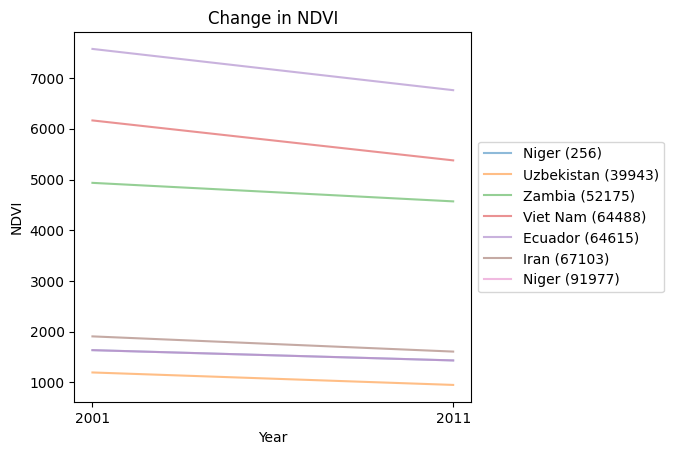

name,Niger (256),Uzbekistan (39943),Zambia (52175),Viet Nam (64488),Ecuador (64615),Iran (67103),Niger (91977)
2001,1636.7500,1196.958333,4934.200000,6164.603535,7574.0,1908.125000,1636.7500
2011,1433.9375,951.363636,4569.111111,5377.238095,6761.0,1608.409091,1433.9375


In [68]:

for i in ndvi_dft.columns:
    plt.plot(ndvi_dft[i], label=i, alpha=0.8) 
  
plt.ylabel('NDVI') 
plt.xlabel('Year') 
plt.title('Change in NDVI') 

plt.legend()
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

ndvi_dft



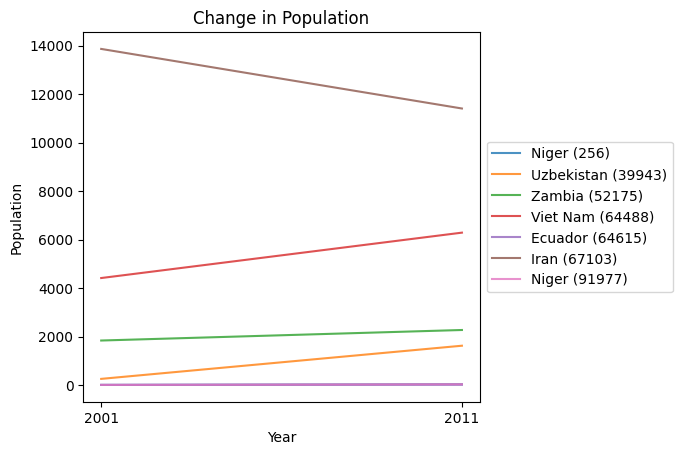

name,Niger (256),Uzbekistan (39943),Zambia (52175),Viet Nam (64488),Ecuador (64615),Iran (67103),Niger (91977)
2001,12.669615,262.151428,1843.439697,4420.025391,15.062001,13867.176758,12.669615
2011,40.075386,1629.226440,2277.384033,6291.714355,22.629385,11410.609375,40.075386


In [69]:

for i in pop_dft.columns:
    plt.plot(pop_dft[i], label=i, alpha=0.8) 

  
plt.ylabel('Population') 
plt.xlabel('Year') 
plt.title('Change in Population') 

plt.legend()
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show() 

pop_dft